In [1]:
#!pip install category_encoders

In [2]:
#!pip install lightgbm

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer
from sklearn import svm

from sklearn.model_selection import train_test_split, GroupKFold, GridSearchCV
from sklearn.metrics import log_loss, brier_score_loss
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
import re
#import torch
import tensorflow as tf

2025-06-04 13:07:04.434845: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-04 13:07:05.455421: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-04 13:07:05.460228: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-04 13:07:07.293592: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Goals: 
    Find y variables
    Numerical Analysis
    Object Anlysis 

    Scale and Impute Both
    Put it in a model or multiple models and provide outputs

In [4]:
train_data_df = pd.read_csv('data/trainData.csv')
test_data_df = pd.read_csv('data/testData.csv')

# train_data_df = pd.read_csv('/kaggle/input/data-both/trainData.csv')
# test_data_df = pd.read_csv('/kaggle/input/data-both/testData.csv')

train_data_df.head()
#train_data_df.columns
#test_data_df.head()

,Race_Time,Race_ID,Course,Distance,distanceYards,Prize,Going,Horse,Trainer,Jockey,...,Speed_2ndPreviousRun,NMFPLTO,MarketOdds_PreviousRun,MarketOdds_2ndPreviousRun,TrainerRating,JockeyRating,daysSinceLastRun,SireRating,DamsireRating,meanRunners
0,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Intervention,Michael Appleby,Aiden Brookes,...,70.0,0.875000,11.03,3.60,2.377268,2.925027,7.0,2.933961,0.467149,10.25
1,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Evocative Spark,Darryll Holland,Christian Howarth,...,48.0,0.181818,42.67,4.19,2.401274,2.611219,13.0,1.934009,0.459547,10.25
2,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Sluzewiec,Scott Dixon,Kieran O'Neill,...,59.0,0.000000,141.13,86.83,2.824967,2.925073,50.0,2.411403,0.456616,8.00
3,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Muscika,David O'Meara,Mark Winn,...,73.0,0.333333,8.97,12.86,2.317504,2.534689,38.0,2.639010,0.462397,10.00
4,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Venturous,David Barron,David Probert,...,62.0,0.090909,44.84,18.20,2.292027,2.448742,24.0,2.494198,0.450770,11.00


In [5]:
print(len(train_data_df.columns))
print(len(test_data_df.columns))

28
28


In [6]:
known_col_from_train = train_data_df[
    ["betfairSP", "Position", "timeSecs", "pdsBeaten", "NMFP"]
].copy()

train_data_df = train_data_df.drop(columns = ["betfairSP", "Position", "timeSecs", "pdsBeaten", "NMFP"])



known_col_from_test = test_data_df[
    ["betfairSP", "Position", "timeSecs", "pdsBeaten", "NMFP"]
].copy()


test_data_df = test_data_df.drop(columns = ["betfairSP", "Position", "timeSecs", "pdsBeaten", "NMFP"])
known_col_from_test

,betfairSP,Position,timeSecs,pdsBeaten,NMFP
0,140.00,11,137.449997,3.238678,0.000000
1,10.05,8,135.809998,2.641732,0.272727
2,14.15,7,135.759995,2.616483,0.363636
3,58.42,10,137.380005,3.217875,0.090909
4,14.99,3,134.570007,1.681759,0.727273
...,...,...,...,...,...
11270,19.14,6,226.589996,3.589059,0.142857
11271,10.55,7,251.339996,4.977423,0.000000
11272,2.38,3,220.589996,2.282382,0.571429
11273,4.80,2,219.339996,1.458615,0.714286


In [7]:
print(len(train_data_df.columns))
print(len(known_col_from_train.columns))
#print(train_data_df.columns)

print(len(test_data_df.columns))
print(len(known_col_from_test.columns))

23
5
23
5


In [8]:
#known_col_from_train[known_col_from_train['Position'] == 1]


# There 52099 total races in dataset, 5348 horse get first place 10%->Stratified when modeelling
# NMFP = 1 – Position/Runners -> We get it from lagged indicators anyways
first_pos_train = known_col_from_train.query("Position == 1")
first_pos_train

,betfairSP,Position,timeSecs,pdsBeaten,NMFP
5,14.00,1,73.190002,0.0,0.833333
9,10.16,1,61.750000,0.0,0.857143
15,7.31,1,60.490002,0.0,0.909091
30,34.00,1,166.160004,0.0,0.875000
38,6.83,1,89.120003,0.0,0.888889
...,...,...,...,...,...
52057,4.70,1,72.599998,0.0,0.875000
52062,4.01,1,57.270000,0.0,0.875000
52069,5.31,1,84.320000,0.0,0.909091
52084,5.85,1,71.320000,0.0,0.875000


In [9]:
#train_data_df["Position"] = known_col_from_train["Position"]
#test_data_df["Position"] = known_col_from_test["Position"]
train_data_df['Win'] = (known_col_from_train['Position'] == 1).astype(int) # Only wins  are kept
test_data_df['Win'] = (known_col_from_test['Position'] == 1).astype(int) # Only wins  are kept
print(len(train_data_df.columns))
print(len(test_data_df.columns))

24
24


In [10]:
first_pos_train.describe()

,betfairSP,Position,timeSecs,pdsBeaten,NMFP
count,5348.000000,5348.0,5348.000000,5348.0,5348.000000
mean,9.645815,1.0,107.413239,0.0,0.886073
std,14.964670,0.0,41.148749,0.0,0.039601
min,1.350000,1.0,55.270000,0.0,0.500000
25%,3.970000,1.0,74.010002,0.0,0.875000
50%,6.280000,1.0,97.750000,0.0,0.888889
75%,10.500000,1.0,130.587502,0.0,0.916667
max,503.820000,1.0,270.010010,0.0,0.967742


In [11]:
####### Y VARIABLE FOUND 

In [12]:
train_data_df.info()
# Postion Possible target Variable - Probaibliy is our target variable

#Race_Time maybe in the morning people are tires bad performance but too specifc
#Course - home advantage or something
#Distance - need to analyse this seems important the data is not useuable rn tho
#distanceYards - Seems like distance but actully useable - drop one or the other mayebr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52099 entries, 0 to 52098
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Race_Time                  52099 non-null  object 
 1   Race_ID                    52099 non-null  int64  
 2   Course                     52099 non-null  object 
 3   Distance                   52099 non-null  object 
 4   distanceYards              52099 non-null  int64  
 5   Prize                      52099 non-null  int64  
 6   Going                      52099 non-null  object 
 7   Horse                      52099 non-null  object 
 8   Trainer                    52099 non-null  object 
 9   Jockey                     52099 non-null  object 
 10  Runners                    52099 non-null  int64  
 11  Age                        52099 non-null  int64  
 12  Speed_PreviousRun          52007 non-null  float64
 13  Speed_2ndPreviousRun       51897 non-null  flo

In [13]:
train_data_df.describe()

,Race_ID,distanceYards,Prize,Runners,Age,Speed_PreviousRun,Speed_2ndPreviousRun,NMFPLTO,MarketOdds_PreviousRun,MarketOdds_2ndPreviousRun,TrainerRating,JockeyRating,daysSinceLastRun,SireRating,DamsireRating,meanRunners,Win
count,52099.000000,52099.000000,52099.000000,52099.000000,52099.000000,52007.000000,51897.000000,52007.000000,52007.000000,51897.000000,52061.000000,51956.000000,52033.000000,52098.000000,52097.000000,51896.000000,52099.000000
mean,28265.794603,1846.845314,9117.515173,10.823375,4.611893,56.791951,56.670732,0.460867,39.677750,44.876457,2.582238,2.616470,42.968827,2.713467,0.452173,10.661735,0.102651
std,16052.773350,629.023595,15586.658394,3.628267,1.804776,10.090771,10.063200,0.284294,103.957731,120.031907,0.425703,0.362347,68.741426,0.341802,0.025288,2.354613,0.303505
min,165.000000,1094.000000,2831.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.020000,1.020000,0.787109,1.039670,1.000000,0.968739,0.000000,3.000000,0.000000
25%,14479.000000,1326.000000,3716.000000,8.000000,3.000000,52.000000,52.000000,0.222222,6.820000,6.770000,2.325287,2.393382,14.000000,2.543679,0.441329,9.000000,0.000000
50%,28289.000000,1759.000000,5154.000000,10.000000,4.000000,58.000000,58.000000,0.461538,13.000000,13.000000,2.522024,2.547788,21.000000,2.706665,0.453120,10.250000,0.000000
75%,41872.000000,2200.000000,7731.000000,13.000000,6.000000,63.000000,63.000000,0.714286,28.980000,29.620000,2.807251,2.829985,37.000000,2.876019,0.466828,11.750000,0.000000
max,56178.000000,4497.000000,330001.000000,31.000000,13.000000,87.000000,86.000000,0.967742,1000.000000,1000.000000,6.084499,6.308190,2544.000000,6.876989,0.827778,24.500000,1.000000


In [14]:
## Before we do any shennangians need to figure out what the data means , what we are trying to fidn 

In [15]:
train_data_df.loc[train_data_df.duplicated()]

,Race_Time,Race_ID,Course,Distance,distanceYards,Prize,Going,Horse,Trainer,Jockey,...,NMFPLTO,MarketOdds_PreviousRun,MarketOdds_2ndPreviousRun,TrainerRating,JockeyRating,daysSinceLastRun,SireRating,DamsireRating,meanRunners,Win


In [16]:
## Split it into numerical and objects

In [17]:
train_data_df.columns

Index(['Race_Time', 'Race_ID', 'Course', 'Distance', 'distanceYards', 'Prize',
       'Going', 'Horse', 'Trainer', 'Jockey', 'Runners', 'Age',
       'Speed_PreviousRun', 'Speed_2ndPreviousRun', 'NMFPLTO',
       'MarketOdds_PreviousRun', 'MarketOdds_2ndPreviousRun', 'TrainerRating',
       'JockeyRating', 'daysSinceLastRun', 'SireRating', 'DamsireRating',
       'meanRunners', 'Win'],
      dtype='object')

In [18]:
train_data_df_numerical = train_data_df.select_dtypes(exclude='object')
train_data_df_obj = train_data_df.select_dtypes(include='object')



In [19]:
train_data_df_obj

,Race_Time,Course,Distance,Going,Horse,Trainer,Jockey
0,02/01/2024 19:00:00,Wolverhampton,6f 20y,Standard,Intervention,Michael Appleby,Aiden Brookes
1,02/01/2024 19:00:00,Wolverhampton,6f 20y,Standard,Evocative Spark,Darryll Holland,Christian Howarth
2,02/01/2024 19:00:00,Wolverhampton,6f 20y,Standard,Sluzewiec,Scott Dixon,Kieran O'Neill
3,02/01/2024 19:00:00,Wolverhampton,6f 20y,Standard,Muscika,David O'Meara,Mark Winn
4,02/01/2024 19:00:00,Wolverhampton,6f 20y,Standard,Venturous,David Barron,David Probert
...,...,...,...,...,...,...,...
52094,31/12/2024 15:22:00,Lingfield,1m 4f,Standard,Fullforward,Michael Madgwick,William Carson
52095,31/12/2024 15:22:00,Lingfield,1m 4f,Standard,Pablo Prince,Karen Jewell,Luke Morris
52096,31/12/2024 15:22:00,Lingfield,1m 4f,Standard,Paradoxical,Jennie Candlish,George Wood
52097,31/12/2024 15:22:00,Lingfield,1m 4f,Standard,Keen Interest,Alice Haynes,Kieran O'Neill


In [20]:
train_data_df_numerical

,Race_ID,distanceYards,Prize,Runners,Age,Speed_PreviousRun,Speed_2ndPreviousRun,NMFPLTO,MarketOdds_PreviousRun,MarketOdds_2ndPreviousRun,TrainerRating,JockeyRating,daysSinceLastRun,SireRating,DamsireRating,meanRunners,Win
0,1935,1340,4972,6,7,75.0,70.0,0.875000,11.03,3.60,2.377268,2.925027,7.0,2.933961,0.467149,10.25,0
1,1935,1340,4972,6,5,62.0,48.0,0.181818,42.67,4.19,2.401274,2.611219,13.0,1.934009,0.459547,10.25,0
2,1935,1340,4972,6,5,51.0,59.0,0.000000,141.13,86.83,2.824967,2.925073,50.0,2.411403,0.456616,8.00,0
3,1935,1340,4972,6,10,65.0,73.0,0.333333,8.97,12.86,2.317504,2.534689,38.0,2.639010,0.462397,10.00,0
4,1935,1340,4972,6,11,59.0,62.0,0.090909,44.84,18.20,2.292027,2.448742,24.0,2.494198,0.450770,11.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52094,56178,2640,4711,11,4,56.0,43.0,0.833333,9.04,13.23,2.968319,2.767347,57.0,2.718093,0.480990,8.75,0
52095,56178,2640,4711,11,6,45.0,55.0,0.500000,48.38,5.09,3.233067,2.457842,40.0,3.019927,0.449697,11.50,0
52096,56178,2640,4711,11,3,71.0,58.0,0.800000,6.03,7.12,2.554826,2.555626,5.0,2.584142,0.450076,10.50,1
52097,56178,2640,4711,11,3,53.0,51.0,0.400000,26.57,22.16,2.443137,2.917672,15.0,2.632082,0.456602,10.75,0


In [21]:
### First we do stuff with Numerical we check the following:
##      - Scatter plots to see outliers (or Zscore) / Normally dsitributed (Histograms) -> transform -> Drop outliers / Handle Outliers 
##      - Box plots -> Check SImularities and drop things whicha are too similar
##      - Correlation between each feature -> DRop things which are too correlated
##      - Pivot tables -> See how they affect solution


## Histograms

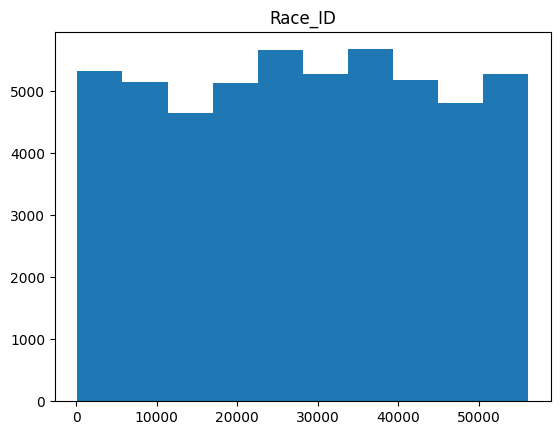

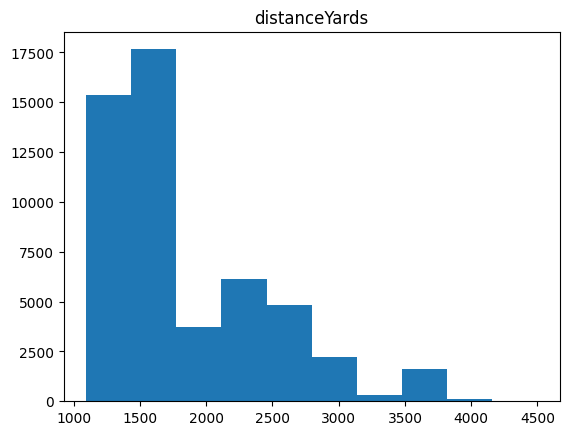

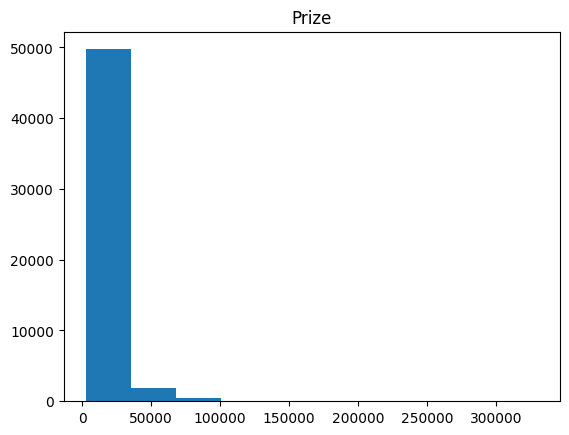

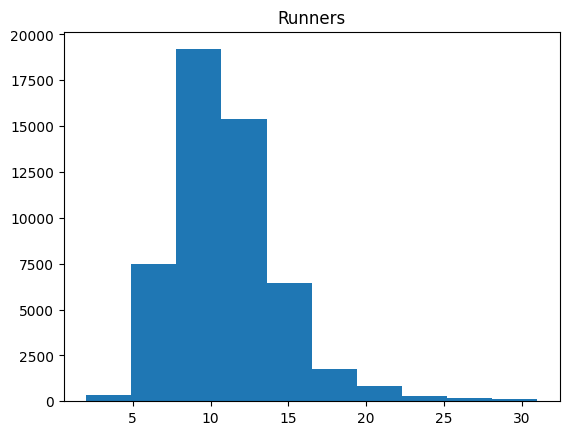

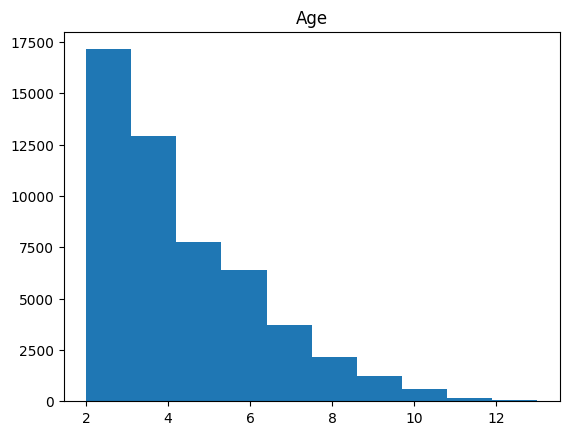

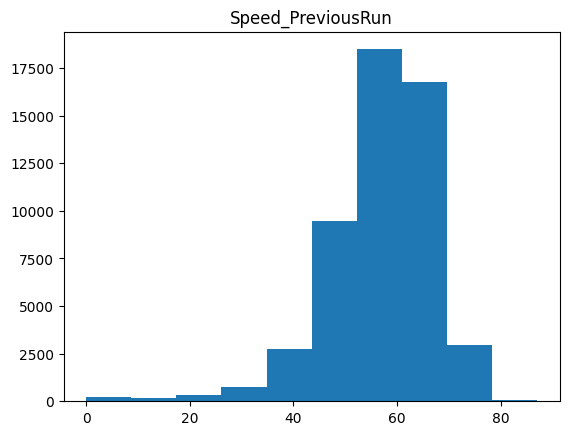

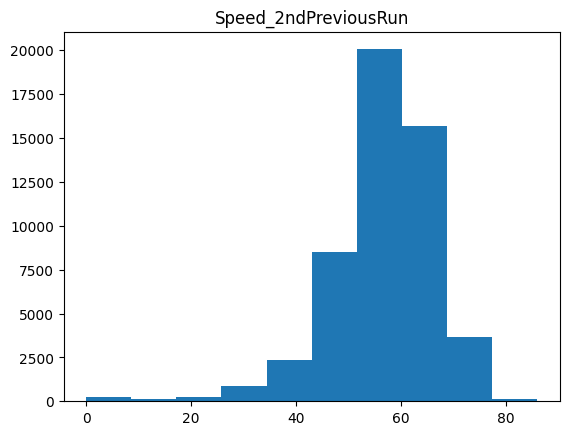

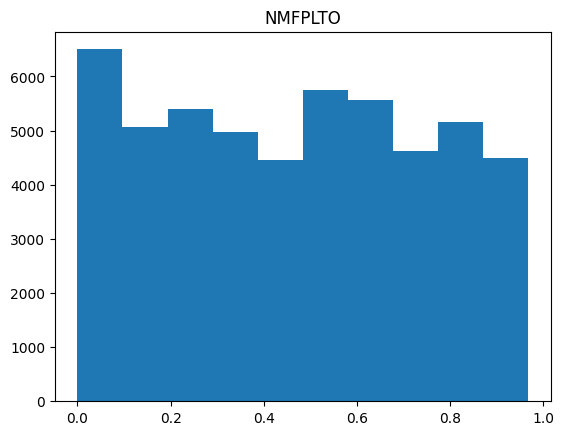

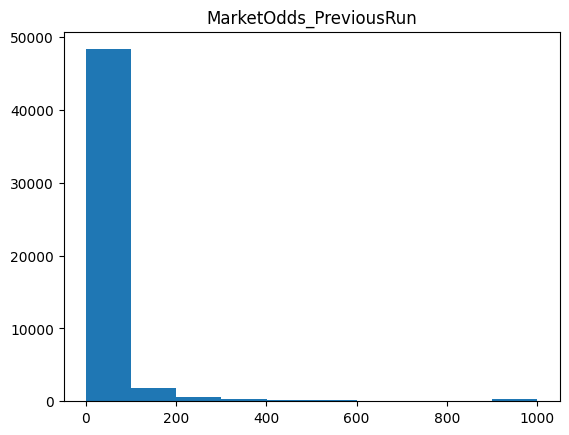

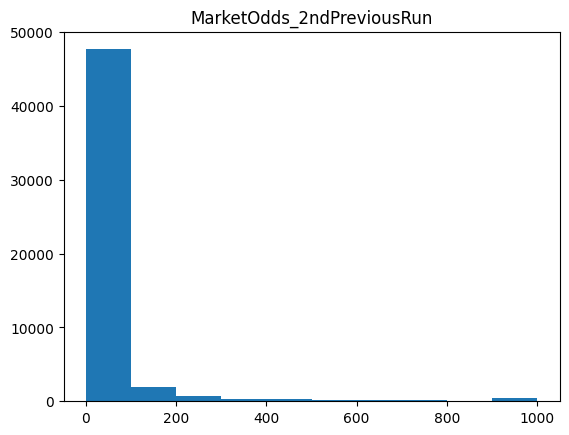

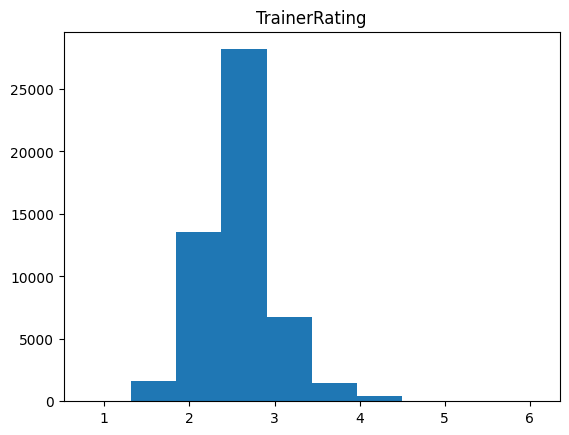

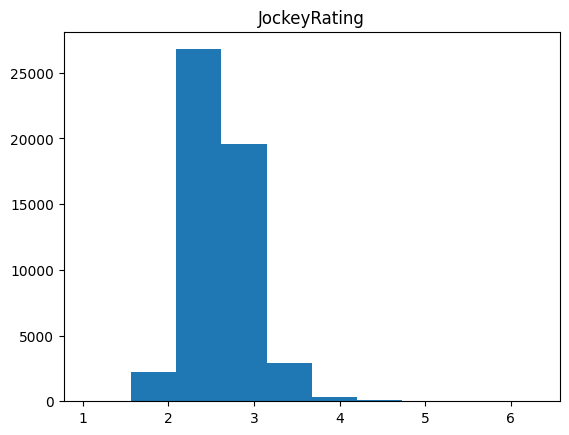

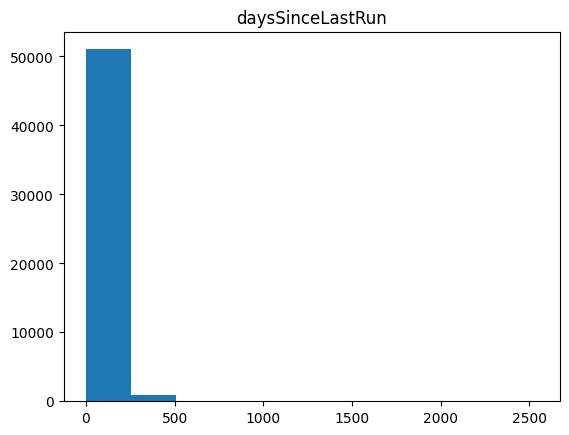

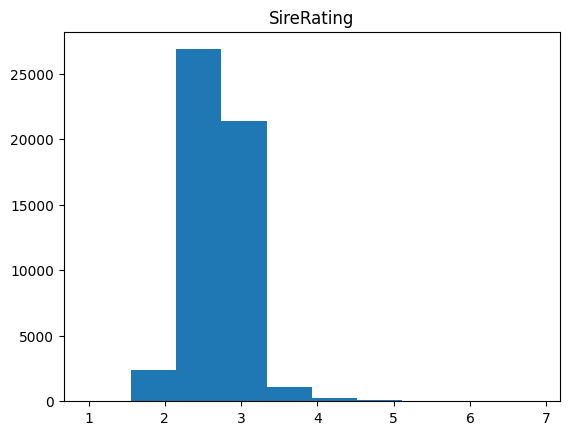

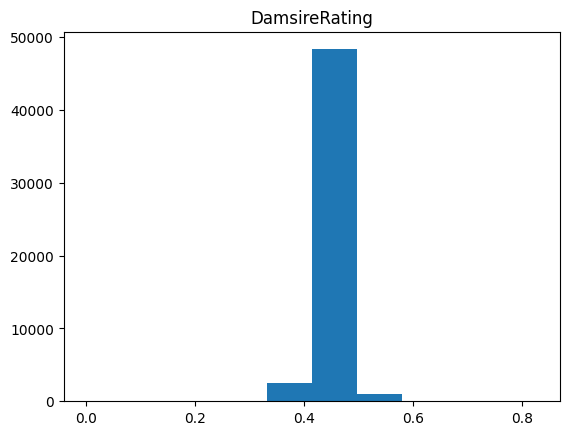

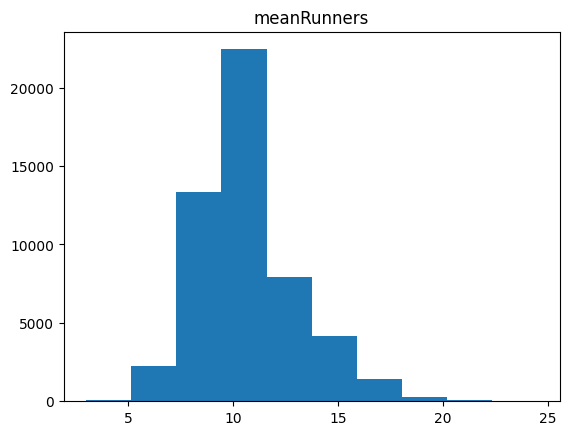

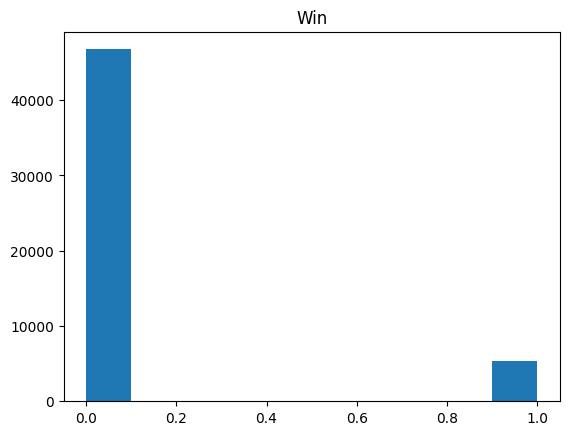

In [22]:
for i in train_data_df_numerical.columns:
    plt.hist(train_data_df_numerical[i])  # Drop NaNs if any
    plt.title(i)
    plt.show()

In [23]:
# Race_ID = drop no info
# DistanceYard -> Normalisze
# Prize -> Normalisze
# Runners -> keep looks normal
# Age -> maybe normalize not enough bins to make a differences tho

# Speed_preRun -> Keep looks normal
# Speed_pre2Run -> Keep looks normal
# NMFPLTO -> 
# MarketOdds_preRun -> Normalsize
# MarketOdds_secondpreRun -> Normalsize
# TrainerRate - Keep looks normal
# JockeyRating - Keep looks normal
# daysSinceLastRun - Normlaize
# SireRating - Keep looks normal
# DamsireRating - Keep looks normal -> Only one values maybe drop not imformative enough
# meanRunners - Keep looks normal
# Win - is our y varibles so ignore

In [24]:
print(train_data_df_numerical["Runners"].isna().sum()) #good 
print(train_data_df_numerical["Speed_PreviousRun"].isna().sum()) # zero maybe havent raced before 
print(train_data_df_numerical["Speed_2ndPreviousRun"].isna().sum()) # zero maybe havent raced before before 
print(train_data_df_numerical["TrainerRating"].isna().sum()) # Numerical Performance maybe drop # Could impute average maybe
print(train_data_df_numerical["JockeyRating"].isna().sum()) # Numerical Performance maybe drop
print(train_data_df_numerical["SireRating"].isna().sum()) # Drop only 1 -> no info
print(train_data_df_numerical["meanRunners"].isna().sum()) # Maybe split this -> just gonna drop


0
92
202
38
143
1
203


In [25]:
## Find correlation between winning and meanRunners
train_data_df["Win"].groupby(train_data_df["meanRunners"].isna()).mean()## Cant DROP its imformative again that 200 data points only
## I think im gonna drop it mainly for simplicity dont want to make model confused but possible feature engineering maybe making a new column or something 


meanRunners
False    0.102860
True     0.049261
Name: Win, dtype: float64

# BOXPLOTS

/home/ninja123superxl/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


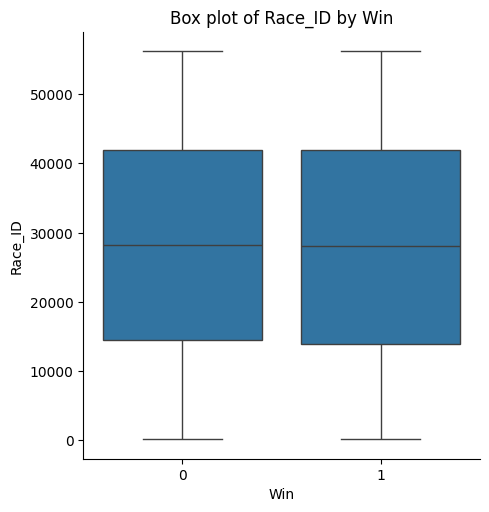

/home/ninja123superxl/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


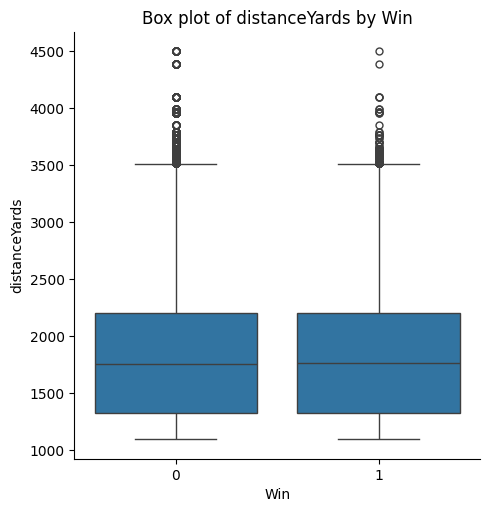

/home/ninja123superxl/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


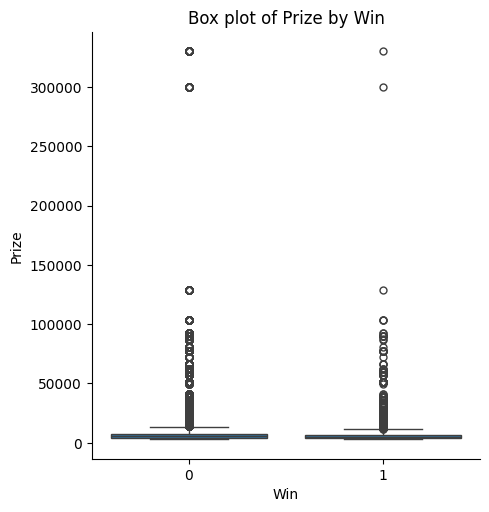

/home/ninja123superxl/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


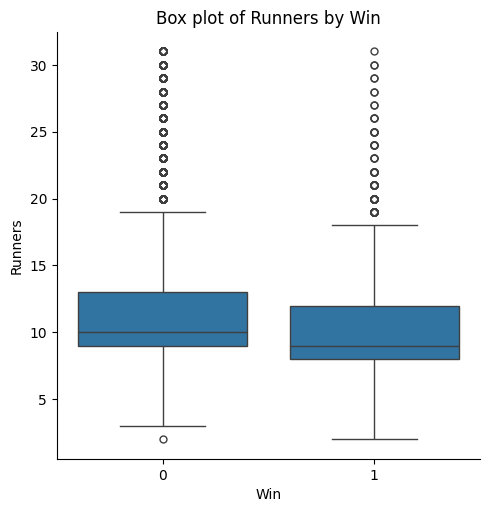

/home/ninja123superxl/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


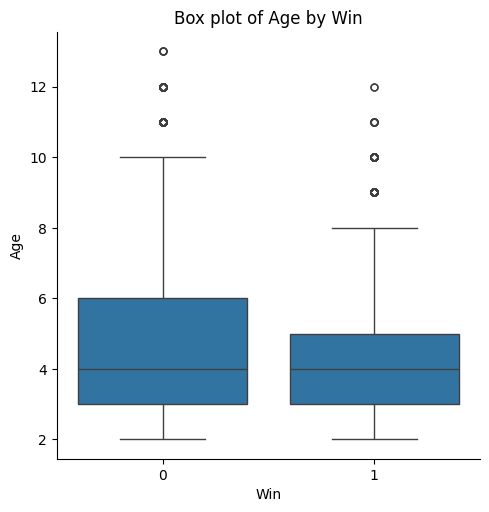

/home/ninja123superxl/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


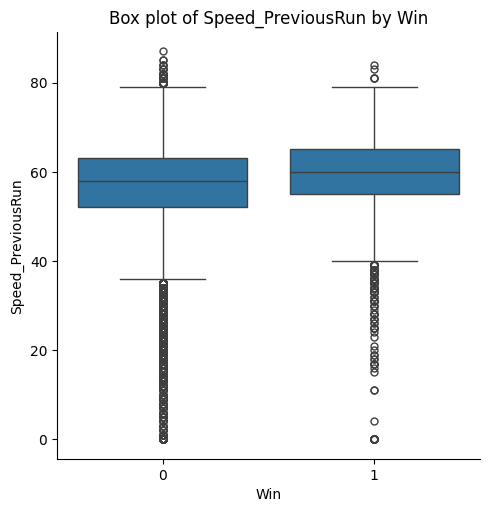

/home/ninja123superxl/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


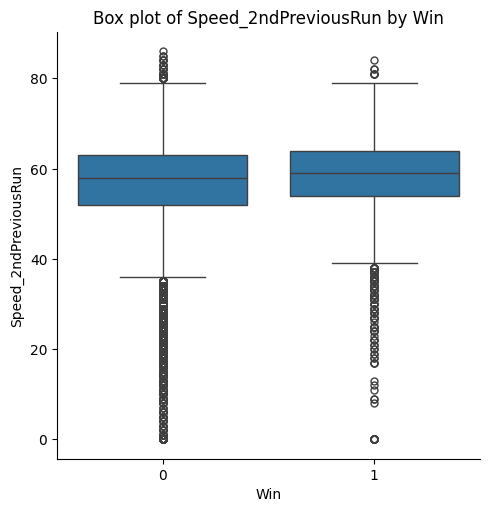

/home/ninja123superxl/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


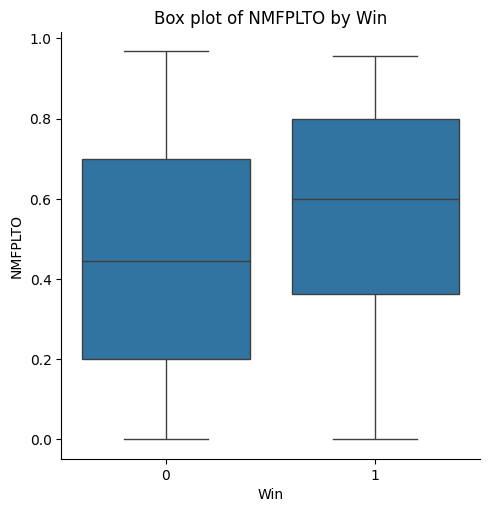

/home/ninja123superxl/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


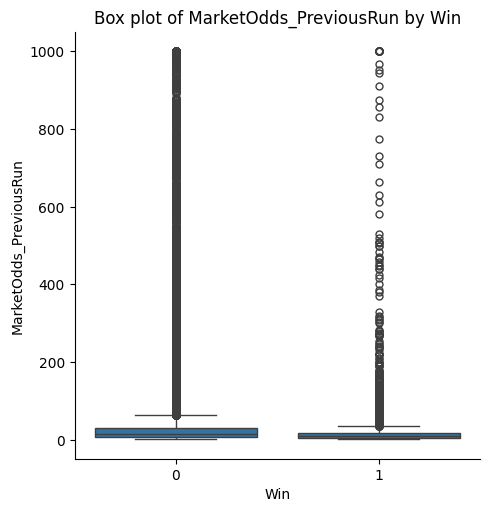

/home/ninja123superxl/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


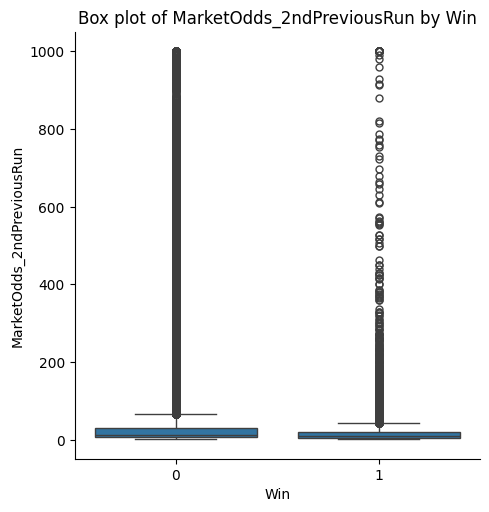

/home/ninja123superxl/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


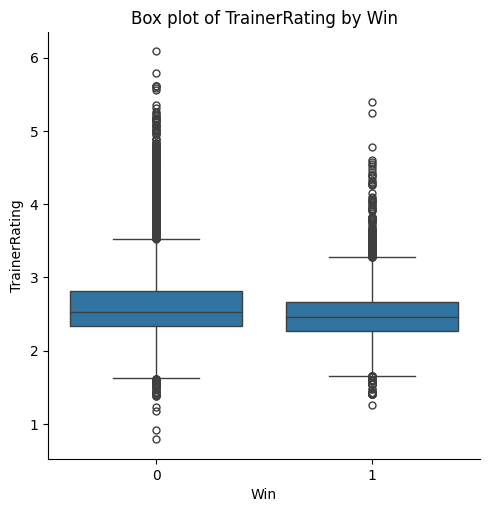

/home/ninja123superxl/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


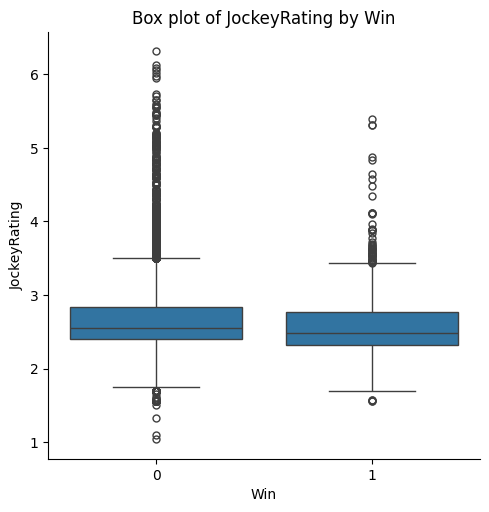

/home/ninja123superxl/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


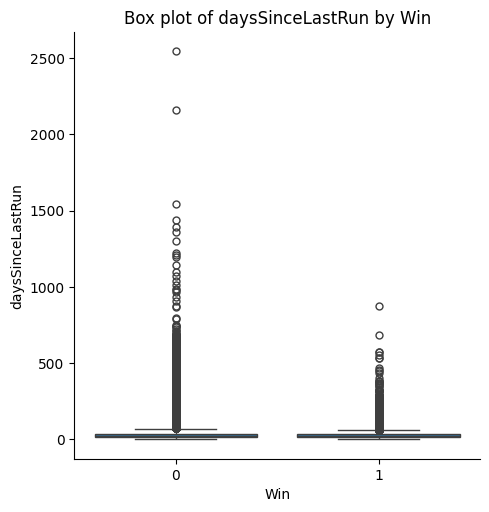

/home/ninja123superxl/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


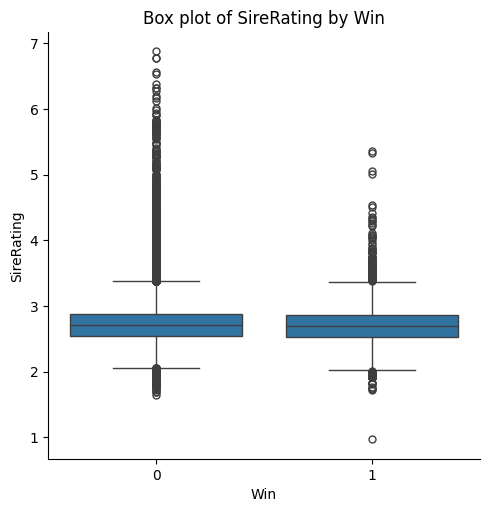

/home/ninja123superxl/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


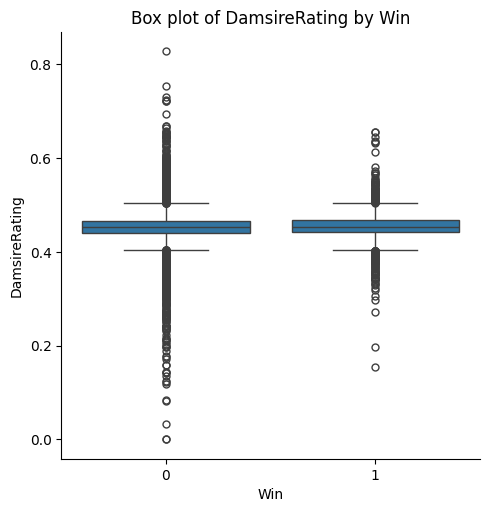

/home/ninja123superxl/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


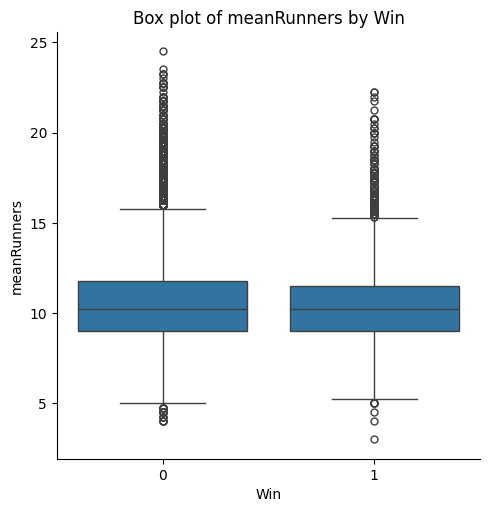

/home/ninja123superxl/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


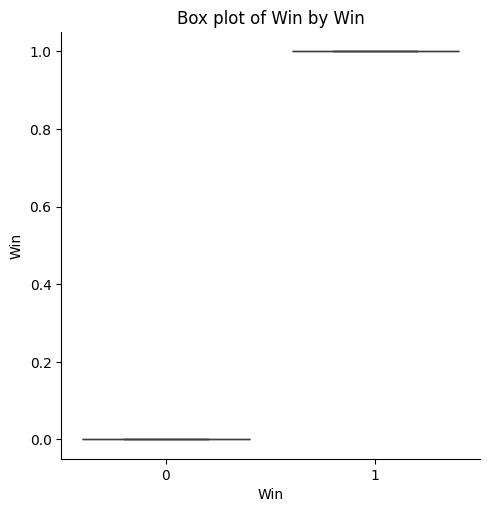

In [26]:
for i in train_data_df_numerical.columns:
    sns.catplot(x="Win", y=i, kind="box", data=train_data_df)
    plt.title(f"Box plot of {i} by Win")
    plt.show()

In [27]:
# slightly less runners -> more wins (weak)
# Less age -> more wins 
# Speed_PreviousRun -> More wins (weak)
# Speed_2ndPreviousRun -> More wins (weak)
# NMFPLTO -> More wins
# MarketOdds_PreviousRun -> lower odds mean more wins???? -> Check Nans
print(train_data_df_numerical["MarketOdds_PreviousRun"].isna().sum())
# MarketOdds_2ndPreviousRun -> lower odds mean more wins???? -> Check Nans
print(train_data_df_numerical["MarketOdds_2ndPreviousRun"].isna().sum())
# TrainerRating -> lower rating mean more wins???? -> Check Nans
# JockeyRating -> lower rating mean more wins (very weak)???? -> Check Nans

92
202


## Correlation

<Axes: >

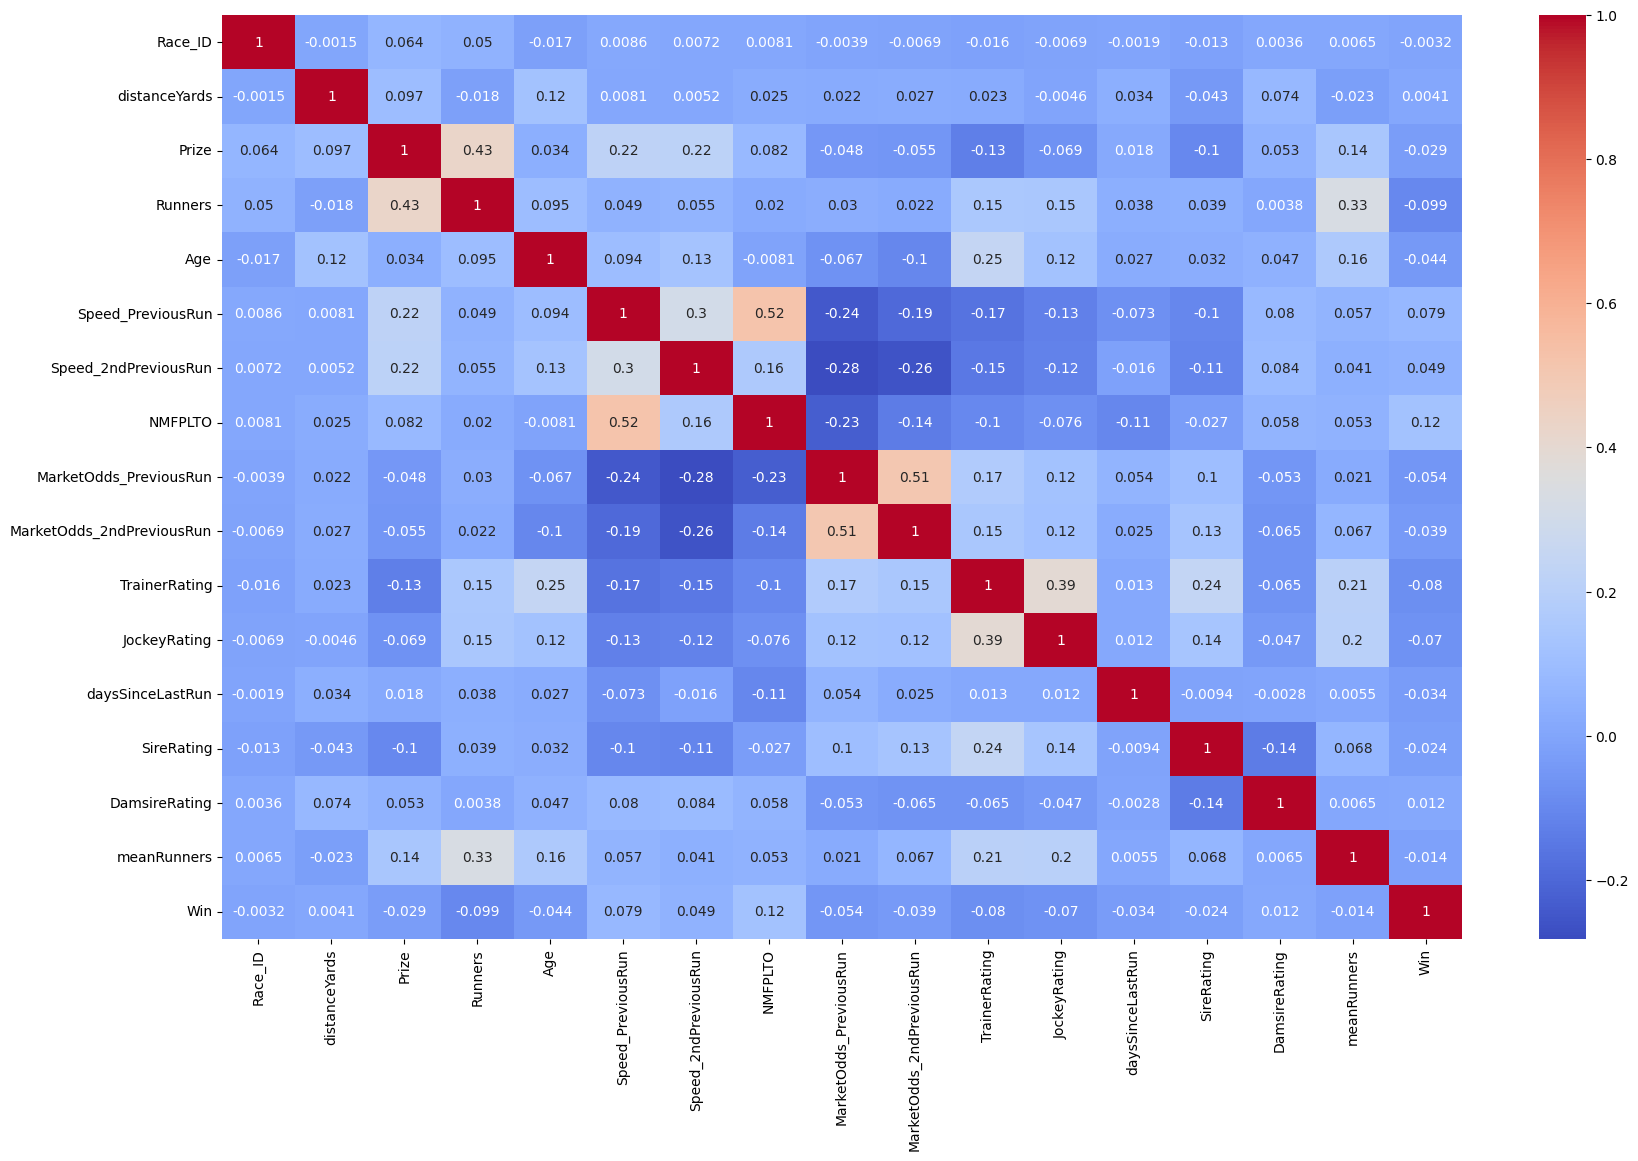

In [28]:
correlation_matrix = train_data_df_numerical.corr(numeric_only = True)
plt.figure(figsize = (20,12))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
## Noteable correlation: -> Not dropping 
    # NMFPLTO and SpeedPrevRun = 0.52
    # NMFPLTO and SpeedPrevRun = 0.52
    # marketOdds_2ndPreviousRun and marketOdds_PreviousRun = 0.51
    # Triaing rating and Jokey rating = 0.39

In [29]:
pd.DataFrame(train_data_df_numerical.isna().sum().sort_values(ascending = False)).head(25)

,0
meanRunners,203
Speed_2ndPreviousRun,202
MarketOdds_2ndPreviousRun,202
JockeyRating,143
MarketOdds_PreviousRun,92
Speed_PreviousRun,92
NMFPLTO,92
daysSinceLastRun,66
TrainerRating,38
DamsireRating,2


## Post-EDA Summary for Numerical Features Only 

- **Drop**: `Race_ID`, `DamsireRating` (uninformative)
- **Target (`y`)**: `Win`

### 🧪 Feature Handling

- **Normalize**:
  - `DistanceYard`
  - `Prize`
  - `MarketOdds_PreviousRun`
  - `MarketOdds_2ndPreviousRun`
  - `daysSinceLastRun`
  - `Age` (optional, the bins are small so maybe no affect)

- **Keep (looks normal)**:
  - `Runners`
  - `Speed_PreviousRun`
  - `Speed_2ndPreviousRun`
  - `TrainerRating`
  - `JockeyRating`
  - `SireRating`
  - `meanRunners`

- **Impute + Consider Flagging**:
  - `MarketOdds_PreviousRun`, `MarketOdds_2ndPreviousRun`, `TrainerRating`, `JockeyRating` (some NAs)
  - `meanRunners` → optional: drop or impute with 0 + flag

### 📊 Notable Correlations (keep both):
- `NMFPLTO` ↔ `Speed_PreviousRun` (0.52)
- `MarketOdds_2ndPrevRun` ↔ `MarketOdds_PrevRun` (0.51)
- `TrainerRating` ↔ `JockeyRating` (0.39)

### 🔍 Weak Win Correlations:
- Lower age, lower odds, higher speeds → slightly more wins


## Move on to EDA of Object Data

In [30]:
train_data_df_obj

,Race_Time,Course,Distance,Going,Horse,Trainer,Jockey
0,02/01/2024 19:00:00,Wolverhampton,6f 20y,Standard,Intervention,Michael Appleby,Aiden Brookes
1,02/01/2024 19:00:00,Wolverhampton,6f 20y,Standard,Evocative Spark,Darryll Holland,Christian Howarth
2,02/01/2024 19:00:00,Wolverhampton,6f 20y,Standard,Sluzewiec,Scott Dixon,Kieran O'Neill
3,02/01/2024 19:00:00,Wolverhampton,6f 20y,Standard,Muscika,David O'Meara,Mark Winn
4,02/01/2024 19:00:00,Wolverhampton,6f 20y,Standard,Venturous,David Barron,David Probert
...,...,...,...,...,...,...,...
52094,31/12/2024 15:22:00,Lingfield,1m 4f,Standard,Fullforward,Michael Madgwick,William Carson
52095,31/12/2024 15:22:00,Lingfield,1m 4f,Standard,Pablo Prince,Karen Jewell,Luke Morris
52096,31/12/2024 15:22:00,Lingfield,1m 4f,Standard,Paradoxical,Jennie Candlish,George Wood
52097,31/12/2024 15:22:00,Lingfield,1m 4f,Standard,Keen Interest,Alice Haynes,Kieran O'Neill


In [31]:
pd.DataFrame(train_data_df_obj.isna().sum().sort_values(ascending = False)).head(25)

,0
Race_Time,0
Course,0
Distance,0
Going,0
Horse,0
Trainer,0
Jockey,0


In [32]:
len(train_data_df_obj['Race_Time'].unique()) #  Feature engineer-------Maybe convert this into int maybe different times affect win chance really doubt it maybe drop???

#Something like this maybe 
# dt = pd.to_datetime(df['Race_Time'], dayfirst=True)
# df['Month'] = dt.dt.month
# df['DOW']   = dt.dt.weekday
# df['Hour']  = dt.dt.hour

5337

In [33]:
len(train_data_df_obj['Course'].unique())# Encode this - OHE 

59

In [34]:
len(train_data_df_obj['Distance'].unique())# Feature Engineer 

277

In [35]:
len(train_data_df_obj['Going'].unique())# Encode -Ordinal encoidng 

7

In [36]:
len(train_data_df_obj['Horse'].unique())# again way too high cant encode -> Drop

9723

In [37]:
# top_winning_horses = train_data_df[train_data_df["Win"] == 1].groupby("Horse")["Win"].count().sort_values(ascending=False)
# print(top_winning_horses.head(10))

# ## MAYBE GROUP HORSES BASED ON WINS????????????????


In [38]:
# cumwins = train_data_df.sort_values('Race_Time').groupby('Horse')['Win'].cumsum().shift(1)
# cumwins.unique()
# train_data_df.head()

In [39]:
# train_data_df = train_data_df.sort_values('Race_Time')

# # Add cumulative wins up to (but not including) this race
# train_data_df['Horse_PrevWins'] = (
#     train_data_df.groupby('Horse')['Win'].cumsum().shift(1).fillna(0).astype(int)
# )

# train_data_df.head()

# #train_data_df.query("Horse_PrevWins == 6")

In [40]:
# horse = 'Jordan Electrics'
# sub = train_data_df[train_data_df['Horse'] == horse]          
# print(sub[['Race_Time', 'Win', 'Horse_PrevWins']].tail(10))

In [41]:
# train_data_df['Race_Time_dt'] = pd.to_datetime(train_data_df['Race_Time'], dayfirst=True)   # important!

# # 2️⃣  Re-run the cumulative-win feature on the correctly sorted frame
# df = train_data_df.sort_values('Race_Time_dt')

# df['Horse_PrevWins'] = (
#     df.groupby('Horse')['Win'].cumsum().shift(1).fillna(0).astype(int)
# )

# horse = 'Jordan Electrics'
# sub = df[df['Horse'] == horse]          
# print(sub[['Race_Time', 'Win', 'Horse_PrevWins']].tail(10))

In [42]:
len(train_data_df_obj['Trainer'].unique())# target Encode ?again way too high cant encode

715

In [43]:
len(train_data_df_obj['Jockey'].unique())# target Encode ?again way too high cant encode

605

<!-- # Impliment EDA descision there are alot so get ready:
### Drop 
#### Numerical
Win - our y
Race_ID - temporarily 
DamsireRating
#### Objects



### Transform
#### Numerical
DistanceYard
Prize
MarketOdds_preRun
MarketOdds_secondpreRun
daysSinceLastRun
#### Objects 
Race_Time
Distance



### Add
#### Numerical
df['ImpliedProb_prev'] = 1 / df['MarketOdds_PreviousRun']
df['SpeedRank']        = df.groupby('Race_ID')['Speed_PreviousRun'].rank('min') / df['Runners']
#### Objects


### Weirds idk yet 
NMFPLTO
Trainer
Jockey
Horse - bad decision :(

### Imputing:
Speed_PreviousRun = 0
Speed_2ndPreviousRun = 0
TrainerRating = drop or Average
JockeyRating = Maybe drop
SireRating = drop
meanRunners = drop
MarketOdds_PreviousRun = ?
MarketOdds_2ndPreviousRun = ?
NMFPLTO = ?
daysSinceLastRun = ?
SireRating = ?

### Encoding: 
Course  = OHE
Going = Ordinal Encoding 
ANy other object needs encoding after feature engineering -->


## EDA Implementation Plan

### 🔻 Drop
#### Numerical
- `Win` (target)
- `Race_ID` (temporary) -INCLUDE IT LATER VERY IMPORTANT
- `DamsireRating`

#### Categorical
- (None yet)

---

### 🔄 Transform
#### Numerical
- `DistanceYard`
- `Prize`
- `MarketOdds_PreviousRun`
- `MarketOdds_2ndPreviousRun`
- `daysSinceLastRun`

#### Categorical
- `Race_Time`
- `Distance`

---

### ➕ Add
#### Numerical
- `ImpliedProb_prev` = 1 / `MarketOdds_PreviousRun`
- `SpeedRank` = rank of `Speed_PreviousRun` within `Race_ID` / `Runners`

#### Categorical
- (None yet)

---

### ❓ Ambiguous
- `NMFPLTO`
- `Trainer`, `Jockey`
- `Horse` — likely unhelpful (high cardinality)

#Keep Trainer and Joekcy and do target encoding -> KFold target Encoding ??? something new -> make sure no data leakage
#Just keep NMFPLT0
---

### 🧩 Impute (What to do with NA rows)

| Column                                | Impute Value     | Add _missing Flag? | Rationale                                                                 |
|---------------------------------------|------------------|--------------------|---------------------------------------------------------------------------|
| Speed_PreviousRun, Speed_2ndPreviousRun | Median           | Yes                | 0 is not a valid speed; median preserves scale; flag marks no past speed. |
| MarketOdds_PreviousRun, MarketOdds_2ndPreviousRun | Median | Yes                | Odds of 0 don't occur; median is neutral; flag captures debut horses.     |
| NMFPLTO                                | 0.5              | Yes                | Midfield (0.5) is a neutral guess; flag indicates unknown last finish.    |
| daysSinceLastRun                       | Median           | Yes                | 0 days is rare and misleading; flag signals a first-time starter.         |
| TrainerRating, JockeyRating, SireRating, meanRunners | Median | Yes            | Retains data; median keeps spread small; flag captures “unknown pedigree”.|


### 🏷️ Encode
- `Course` → One-Hot Encoding
- `Going` → Ordinal Encoding
- All other objects → encode after feature engineering


In [44]:
train_data_df.head() # We dropped ["betfairSP", "Position", "timeSecs", "pdsBeaten", "NMFP"] and added ['Win] hence the 5x24
print(train_data_df.shape)

(52099, 24)


In [45]:
test_data_df.head()
print(test_data_df.shape)
#df = test_data_df.copy() 

(11275, 24)


In [46]:
### DROPPING
train_data_df = train_data_df.drop(columns = ["DamsireRating"])
test_data_df = test_data_df.drop(columns = ["DamsireRating"])
print(train_data_df.shape)
print(test_data_df.shape)

(52099, 23)
(11275, 23)


(52099, 28)
(11275, 28)
(52099, 28)
(11275, 28)


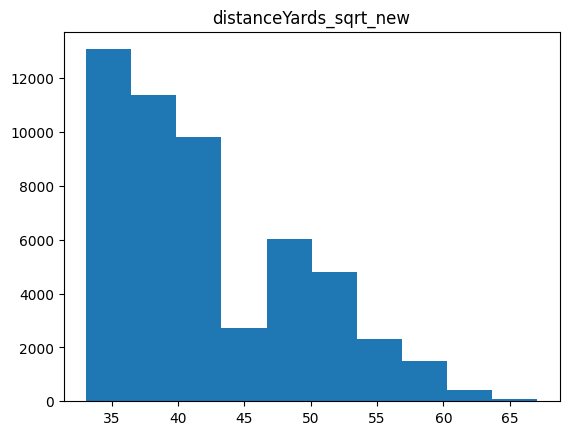

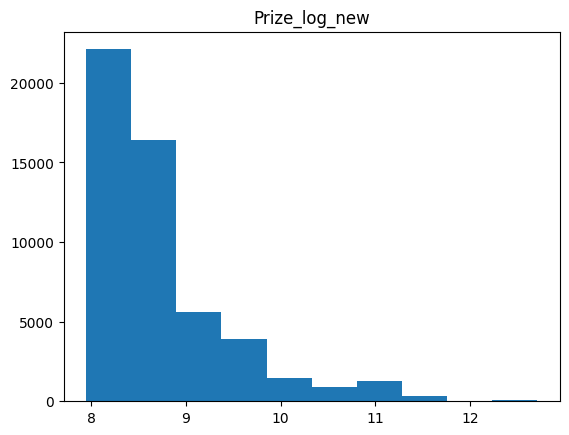

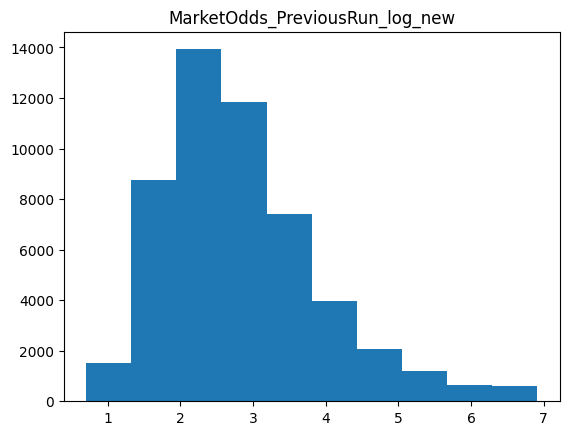

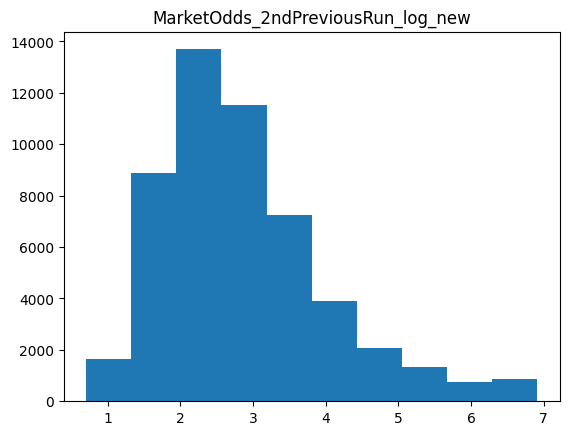

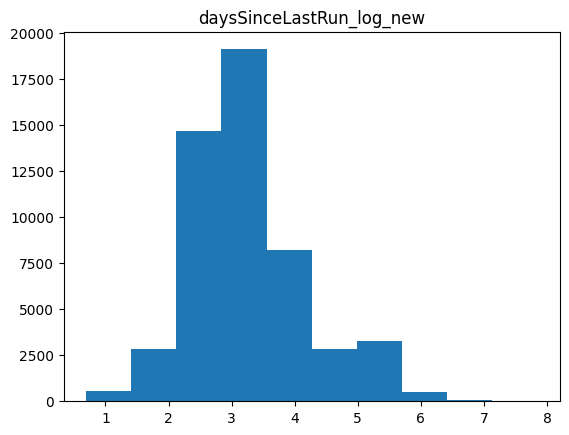

In [47]:
### TRANSFORM
train_data_df['distanceYards_sqrt_new']            = np.sqrt(train_data_df['distanceYards']) # the bins are small
train_data_df['Prize_log_new']                     = np.log1p(train_data_df['Prize'])
train_data_df['MarketOdds_PreviousRun_log_new']    = np.log1p(train_data_df['MarketOdds_PreviousRun'])
train_data_df['MarketOdds_2ndPreviousRun_log_new'] = np.log1p(train_data_df['MarketOdds_2ndPreviousRun'])
train_data_df['daysSinceLastRun_log_new']          = np.log1p(train_data_df['daysSinceLastRun'])

test_data_df['distanceYards_sqrt_new']            = np.sqrt(test_data_df['distanceYards']) # 
test_data_df['Prize_log_new']                     = np.log1p(test_data_df['Prize'])
test_data_df['MarketOdds_PreviousRun_log_new']    = np.log1p(test_data_df['MarketOdds_PreviousRun'])
test_data_df['MarketOdds_2ndPreviousRun_log_new'] = np.log1p(test_data_df['MarketOdds_2ndPreviousRun'])
test_data_df['daysSinceLastRun_log_new']          = np.log1p(test_data_df['daysSinceLastRun'])


print(train_data_df.shape)
print(test_data_df.shape)
#train_data_df = train_data_df.drop(columns = ["distanceYards","Prize", "MarketOdds_PreviousRun","MarketOdds_2ndPreviousRun","daysSinceLastRun" ])
#test_data_df = test_data_df.drop(columns = ["distanceYards","Prize", "MarketOdds_PreviousRun","MarketOdds_2ndPreviousRun","daysSinceLastRun" ])

print(train_data_df.shape)
print(test_data_df.shape)



### Im not gonna drop anything or cahnge any outliers seems all valid to me.
test_col = ["distanceYards_sqrt_new", "Prize_log_new", "MarketOdds_PreviousRun_log_new", "MarketOdds_2ndPreviousRun_log_new", "daysSinceLastRun_log_new"]
for i in test_col:
    plt.hist(train_data_df[i])  
    plt.title(i)
    plt.show()


In [48]:
### Transform Race_Time and Distance
#df = train_data_df.copy()                    # your dataframe
dt = pd.to_datetime(train_data_df['Race_Time'], dayfirst=True)

train_data_df['Month'] = dt.dt.month
train_data_df['DOW']   = dt.dt.weekday     # 0 = Monday
train_data_df['Hour']  = dt.dt.hour
train_data_df.drop(columns='Race_Time', inplace=True)   # raw string no longer needed


def to_yards(s):
    m = re.search(r'(\d+)m', s)    # miles
    f = re.search(r'(\d+)f', s)    # furlongs
    y = re.search(r'(\d+)y', s)    # yards
    return (
        (int(m.group(1)) * 1760 if m else 0) +
        (int(f.group(1)) * 220  if f else 0) +
        (int(y.group(1))        if y else 0)
    )

train_data_df['DistYards_new'] = train_data_df['Distance'].apply(to_yards) ###### MESSED UP DROP distanceYards_sqrt_new
train_data_df.drop(columns='Distance', inplace=True)   # drop raw text
print(train_data_df.shape)

correlation_distance = train_data_df["DistYards_new"].corr(train_data_df["distanceYards_sqrt_new"])
print(f"Correlation: {correlation_distance:.4f}")

train_data_df.drop(columns=['Horse'], inplace=True)    # Trainer & Jockey kept for later target-encoding
print(train_data_df.shape)


(52099, 30)
Correlation: 0.9960
(52099, 29)


In [49]:

#df = test_data_df.copy()                    # your dataframe
dt = pd.to_datetime(test_data_df['Race_Time'], dayfirst=True)

test_data_df['Month'] = dt.dt.month
test_data_df['DOW']   = dt.dt.weekday     # 0 = Monday
test_data_df['Hour']  = dt.dt.hour
test_data_df.drop(columns='Race_Time', inplace=True)   # raw string no longer needed


def to_yards(s):
    m = re.search(r'(\d+)m', s)    # miles
    f = re.search(r'(\d+)f', s)    # furlongs
    y = re.search(r'(\d+)y', s)    # yards
    return (
        (int(m.group(1)) * 1760 if m else 0) +
        (int(f.group(1)) * 220  if f else 0) +
        (int(y.group(1))        if y else 0)
    )

test_data_df['DistYards_new'] = test_data_df['Distance'].apply(to_yards)
test_data_df.drop(columns='Distance', inplace=True)   # drop raw text
print(test_data_df.shape)



#test_data_df.drop(columns=['Horse'], inplace=True)    # Trainer & Jockey kept for later target-encoding -> We dont drop horses either we need it for the probs
print(test_data_df.shape)


(11275, 30)
(11275, 30)


In [50]:
train_data_df.columns

Index(['Race_ID', 'Course', 'distanceYards', 'Prize', 'Going', 'Trainer',
       'Jockey', 'Runners', 'Age', 'Speed_PreviousRun', 'Speed_2ndPreviousRun',
       'NMFPLTO', 'MarketOdds_PreviousRun', 'MarketOdds_2ndPreviousRun',
       'TrainerRating', 'JockeyRating', 'daysSinceLastRun', 'SireRating',
       'meanRunners', 'Win', 'distanceYards_sqrt_new', 'Prize_log_new',
       'MarketOdds_PreviousRun_log_new', 'MarketOdds_2ndPreviousRun_log_new',
       'daysSinceLastRun_log_new', 'Month', 'DOW', 'Hour', 'DistYards_new'],
      dtype='object')

In [51]:
test_data_df.columns

Index(['Race_ID', 'Course', 'distanceYards', 'Prize', 'Going', 'Horse',
       'Trainer', 'Jockey', 'Runners', 'Age', 'Speed_PreviousRun',
       'Speed_2ndPreviousRun', 'NMFPLTO', 'MarketOdds_PreviousRun',
       'MarketOdds_2ndPreviousRun', 'TrainerRating', 'JockeyRating',
       'daysSinceLastRun', 'SireRating', 'meanRunners', 'Win',
       'distanceYards_sqrt_new', 'Prize_log_new',
       'MarketOdds_PreviousRun_log_new', 'MarketOdds_2ndPreviousRun_log_new',
       'daysSinceLastRun_log_new', 'Month', 'DOW', 'Hour', 'DistYards_new'],
      dtype='object')

In [52]:
train_data_df[['Month', 'DOW', 'Hour','Prize_log_new',
       'MarketOdds_PreviousRun_log_new', 'MarketOdds_2ndPreviousRun_log_new',
       'daysSinceLastRun_log_new']]


,Month,DOW,Hour,Prize_log_new,MarketOdds_PreviousRun_log_new,MarketOdds_2ndPreviousRun_log_new,daysSinceLastRun_log_new
0,1,1,19,8.511779,2.487404,1.526056,2.079442
1,1,1,19,8.511779,3.776661,1.646734,2.639057
2,1,1,19,8.511779,4.956742,4.475403,3.931826
3,1,1,19,8.511779,2.299581,2.629007,3.663562
4,1,1,19,8.511779,3.825157,2.954910,3.218876
...,...,...,...,...,...,...,...
52094,12,1,15,8.457868,2.306577,2.655352,4.060443
52095,12,1,15,8.457868,3.899545,1.806648,3.713572
52096,12,1,15,8.457868,1.950187,2.094330,1.791759
52097,12,1,15,8.457868,3.316728,3.142427,2.772589


In [53]:
###### ADD NUMERICAL DATA
# could also use MArketOdds_2ndPreviousRun
# I do have log verson already tho
train_data_df['ImpliedProb_prev'] = 1 / train_data_df['MarketOdds_PreviousRun']

# -(best speed = 1) - There rankings compared with each other in a race based on RaceID---
rank_in_field = (
    train_data_df.groupby('Race_ID')['Speed_PreviousRun']
      .rank(method='min', ascending=False)          # 1 = fastest
)

# rescale to 0–1 for numeric stability
train_data_df['SpeedRank'] = (rank_in_field - 1) / (train_data_df['Runners'] - 1)

########################################################################

test_data_df['ImpliedProb_prev'] = 1 / test_data_df['MarketOdds_PreviousRun']

rank_in_field2 = (
    test_data_df.groupby('Race_ID')['Speed_PreviousRun']
      .rank(method='min', ascending=False)          # 1 = fastest
)

# rescale to 0–1 for numeric stability
test_data_df['SpeedRank'] = (rank_in_field2 - 1) / (test_data_df['Runners'] - 1)

In [54]:
 # LOW correlation big can have both ImpliedProb and MarketOdds
correlation = train_data_df["ImpliedProb_prev"].corr(train_data_df["MarketOdds_PreviousRun_log_new"])
print(f"Correlation: {correlation:.4f}")

Correlation: -0.7752


In [55]:
# ALSO LOW CORRELATION
correlation = train_data_df["SpeedRank"].corr(train_data_df["Runners"])
print(f"Correlation: {correlation:.4f}")

Correlation: -0.0008


In [56]:
train_data_df.shape # should have 26 which it does

(52099, 31)

In [57]:
test_data_df.shape

(11275, 32)

In [58]:
#Keep Trainer and Joekcy and do target encoding -> KFold target Encoding ??? something new -> make sure no data leakage
# Just keep NMFPLT0
train_data_df[['Trainer', 'Jockey', 'NMFPLTO', 'SpeedRank']].head()

,Trainer,Jockey,NMFPLTO,SpeedRank
0,Michael Appleby,Aiden Brookes,0.875000,0.0
1,Darryll Holland,Christian Howarth,0.181818,0.6
2,Scott Dixon,Kieran O'Neill,0.000000,1.0
3,David O'Meara,Mark Winn,0.333333,0.2
4,David Barron,David Probert,0.090909,0.8


In [59]:
#Dropping rows breaks race integrity; dropping columns discards useful info.

# Option	Problem
# Mean	Skewed by the long right tails in prize, odds, speed → fills are “too big”, blurring the distinction between average and outlier.
# Literal 0	0 is outside the natural range (odds > 1, speed > 20, etc.). Pulls the column mean down, inflates variance, and tricks distance-based models into thinking “missing” = “tiny”.
# Median	Robust to skew, always in-range, preserves the column’s scale. Combined with the _missing flag, it gives the model the clean numeric plus the “no data” signal.

## Start making Pipelines

In [60]:
train_data_df.columns

Index(['Race_ID', 'Course', 'distanceYards', 'Prize', 'Going', 'Trainer',
       'Jockey', 'Runners', 'Age', 'Speed_PreviousRun', 'Speed_2ndPreviousRun',
       'NMFPLTO', 'MarketOdds_PreviousRun', 'MarketOdds_2ndPreviousRun',
       'TrainerRating', 'JockeyRating', 'daysSinceLastRun', 'SireRating',
       'meanRunners', 'Win', 'distanceYards_sqrt_new', 'Prize_log_new',
       'MarketOdds_PreviousRun_log_new', 'MarketOdds_2ndPreviousRun_log_new',
       'daysSinceLastRun_log_new', 'Month', 'DOW', 'Hour', 'DistYards_new',
       'ImpliedProb_prev', 'SpeedRank'],
      dtype='object')

In [61]:
ohe_cols    = ['Course', 'Going']
tgt_cols    = ['Trainer', 'Jockey']

num_cols    = ['Runners', 'Age',
               'Speed_PreviousRun', 'Speed_2ndPreviousRun',
               'NMFPLTO', 'TrainerRating', 'JockeyRating',
               'SireRating', 'meanRunners',
               'distanceYards_sqrt_new', 'Prize_log_new',
               'MarketOdds_PreviousRun_log_new',
               'MarketOdds_2ndPreviousRun_log_new',
               'daysSinceLastRun_log_new',
               'Month', 'DOW', 'Hour',
               'DistYards_new', 'ImpliedProb_prev', 'SpeedRank']

drop_cols   = ['Race_ID']  # Bring back later

train_data_df = train_data_df.drop(columns = ["distanceYards","Prize", "MarketOdds_PreviousRun","MarketOdds_2ndPreviousRun","daysSinceLastRun" ])
test_data_df = test_data_df.drop(columns = ["distanceYards","Prize", "MarketOdds_PreviousRun","MarketOdds_2ndPreviousRun","daysSinceLastRun" ])

In [62]:
print(train_data_df.shape)
print(test_data_df.shape)

(52099, 26)
(11275, 27)


In [63]:
# Maybe for Uniform data use Minmax Scaling , We use standardScaling assuming normal
num_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='median', add_indicator=True)),
    ('scale',  StandardScaler()) 
])

ohe_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')), # mode
    ('ohe',    OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

#Could also use ODE??

tgt_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('tgt',    TargetEncoder(smoothing=0.3)) # Pulls closer to the global mean
])



In [64]:
col_trans = ColumnTransformer([
    ('num', num_pipe,  num_cols),
    ('ohe', ohe_pipe,  ohe_cols),
    ('tgt', tgt_pipe,  tgt_cols)
], remainder='drop') # Drops columns

col_trans

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Runners', 'Age', 'Speed_PreviousRun',
                                  'Speed_2ndPreviousRun', 'NMFPLTO',
                                  'TrainerRating', 'JockeyRating', 'SireRating',
                                  'meanRunners', 'distanceYards_sqrt_new',
                                  'Prize_log_new',
                                  'MarketOdds_PreviousRun_log_new',
                                  '...
                                  'Hour', 'DistYards_new', 'ImpliedProb_prev',
                                  'SpeedRank']),
                                ('ohe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Course', 'Going']),
                                ('tgt',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('tgt',
                                                  TargetEncoder(smoothing=0.3))]),
                                 ['Trainer', 'Jockey'])])

In [65]:
main_pipeline = Pipeline([
    ('prep', col_trans),
])

main_pipeline

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Runners', 'Age',
                                                   'Speed_PreviousRun',
                                                   'Speed_2ndPreviousRun',
                                                   'NMFPLTO', 'TrainerRating',
                                                   'JockeyRating', 'SireRating',
                                                   'meanRunners',
                                                   'distanceYards_sqrt_new',
                                                   'Prize_log_new',
                                                   'MarketOdd...
                                                   'DistYards_new',
                                                   'ImpliedProb_prev',
                                                   'SpeedRank']),
                                                 ('ohe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Course', 'Going']),
                                                 ('tgt',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('tgt',
                                                                   TargetEncoder(smoothing=0.3))]),
                                                  ['Trainer', 'Jockey'])]))])

In [66]:
X = train_data_df.drop(columns=['Race_ID', 'Win'])
y = train_data_df['Win']
X.shape

(52099, 24)

In [67]:
X.head()
X.select_dtypes(include='object')

,Course,Going,Trainer,Jockey
0,Wolverhampton,Standard,Michael Appleby,Aiden Brookes
1,Wolverhampton,Standard,Darryll Holland,Christian Howarth
2,Wolverhampton,Standard,Scott Dixon,Kieran O'Neill
3,Wolverhampton,Standard,David O'Meara,Mark Winn
4,Wolverhampton,Standard,David Barron,David Probert
...,...,...,...,...
52094,Lingfield,Standard,Michael Madgwick,William Carson
52095,Lingfield,Standard,Karen Jewell,Luke Morris
52096,Lingfield,Standard,Jennie Candlish,George Wood
52097,Lingfield,Standard,Alice Haynes,Kieran O'Neill


In [68]:
y.shape

(52099,)

In [69]:
X.head()

,Course,Going,Trainer,Jockey,Runners,Age,Speed_PreviousRun,Speed_2ndPreviousRun,NMFPLTO,TrainerRating,...,Prize_log_new,MarketOdds_PreviousRun_log_new,MarketOdds_2ndPreviousRun_log_new,daysSinceLastRun_log_new,Month,DOW,Hour,DistYards_new,ImpliedProb_prev,SpeedRank
0,Wolverhampton,Standard,Michael Appleby,Aiden Brookes,6,7,75.0,70.0,0.875000,2.377268,...,8.511779,2.487404,1.526056,2.079442,1,1,19,1340,0.090662,0.0
1,Wolverhampton,Standard,Darryll Holland,Christian Howarth,6,5,62.0,48.0,0.181818,2.401274,...,8.511779,3.776661,1.646734,2.639057,1,1,19,1340,0.023436,0.6
2,Wolverhampton,Standard,Scott Dixon,Kieran O'Neill,6,5,51.0,59.0,0.000000,2.824967,...,8.511779,4.956742,4.475403,3.931826,1,1,19,1340,0.007086,1.0
3,Wolverhampton,Standard,David O'Meara,Mark Winn,6,10,65.0,73.0,0.333333,2.317504,...,8.511779,2.299581,2.629007,3.663562,1,1,19,1340,0.111483,0.2
4,Wolverhampton,Standard,David Barron,David Probert,6,11,59.0,62.0,0.090909,2.292027,...,8.511779,3.825157,2.954910,3.218876,1,1,19,1340,0.022302,0.8


In [70]:
X.columns

Index(['Course', 'Going', 'Trainer', 'Jockey', 'Runners', 'Age',
       'Speed_PreviousRun', 'Speed_2ndPreviousRun', 'NMFPLTO', 'TrainerRating',
       'JockeyRating', 'SireRating', 'meanRunners', 'distanceYards_sqrt_new',
       'Prize_log_new', 'MarketOdds_PreviousRun_log_new',
       'MarketOdds_2ndPreviousRun_log_new', 'daysSinceLastRun_log_new',
       'Month', 'DOW', 'Hour', 'DistYards_new', 'ImpliedProb_prev',
       'SpeedRank'],
      dtype='object')

In [71]:
X_preproc = main_pipeline.fit_transform(X,y)
X_preproc.shape
#X_preproc.select_dtypes(include='object')
print(X_preproc.dtype)

float64


In [72]:
################ ALLEDGLY DATA LEAKGE OH NO BRO!!!!!
# groups = train_data_df['Race_ID']
# # Stratified split (preserves 10 % winners vs 90 % others)
# X_train, X_test, y_train, y_test, grp_train, grp_test = train_test_split(
#     X_preproc, y, groups, test_size=0.2, random_state=1, stratify=y #### GROUPS are so the train data and test data are sampled based on RaceID IMPORTANT
# ) ## But it does nothing 
# print(X_train.shape)
# print(y_train.shape)

# print("=== BEFORE FIXING ===")
# print(f"Total races: {groups.nunique()}")
# print(f"Total horses: {len(X)}")
# print(f"Win rate: {y.mean():.4f}")

# race_overlap = set(grp_train.unique()) & set(grp_test.unique())
# if race_overlap:
#     print(f"⚠️  ERROR: {len(race_overlap)} races appear in both train and test!")
#     print(f"Overlapping races: {list(race_overlap)[:5]}...")
# else:
#     print("✅ SUCCESS: No race overlap between train and test")

# X_train.head()

In [73]:
## COuld use GroupKFOLD for group aware corss validation takes time to run
from sklearn.model_selection import GroupShuffleSplit
groups = train_data_df['Race_ID']
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42) # 20% of the group goes into test 
train_idx, test_idx = next(gss.split(X_preproc, y, groups)) # train_idx = returns the indicies of training set rows same for test_idx 

print(train_idx)
print(test_idx)

X_train = X_preproc[train_idx]
print(X_train)
X_test = X_preproc[test_idx]
y_train = y.iloc[train_idx]
y_test = y.iloc[test_idx]
grp_train = groups.iloc[train_idx] # get rows from groups based on train indexes and puts them in grp_train
grp_test = groups.iloc[test_idx]

print("\n=== AFTER FIXING ===")
print(f"Train races: {grp_train.nunique()}")
print(f"Test races: {grp_test.nunique()}")
print(f"Train horses: {len(X_train)}")
print(f"Test horses: {len(X_test)}")
print(f"Train win rate: {y_train.mean():.4f}")
print(f"Test win rate: {y_test.mean():.4f}")

# CRITICAL CHECK Ensure no race overlap
race_overlap = set(grp_train.unique()) & set(grp_test.unique())
if race_overlap:
    print(f"ERROR: {len(race_overlap)} races appear in both train and test!")
    print(f"Overlapping races: {list(race_overlap)[:5]}...")
else:
    print("SUCCESS: No race overlap between train and test")


[    0     1     2 ... 52096 52097 52098]
[   32    33    34 ... 52085 52086 52087]
[[-1.32940091  1.32322798  1.80580421 ...  1.          0.08819346
   0.08108108]
 [-1.32940091  0.21504662  0.51636318 ...  1.          0.11764706
   0.05357143]
 [-1.32940091  0.21504662 -0.57470232 ...  1.          0.07157058
   0.08521739]
 ...
 [ 0.04868081 -0.89313475  1.40905312 ...  1.          0.13095238
   0.11111111]
 [ 0.04868081 -0.89313475 -0.37632677 ...  1.          0.10513447
   0.08521739]
 [ 0.04868081  1.87731866 -0.57470232 ...  1.          0.11621967
   0.14473684]]

=== AFTER FIXING ===
Train races: 4269
Test races: 1068
Train horses: 41692
Test horses: 10407
Train win rate: 0.1026
Test win rate: 0.1030
SUCCESS: No race overlap between train and test


In [74]:
# TAKES TOO LONG

# clf_svc = SVC(probability=True, class_weight='balanced', random_state=42)

# # param_grid_svc = {
# #     'C': [0.1, 1, 10],
# #     'gamma': [0.01, 0.1, 1.0],
# #     'kernel': ['linear', 'poly', 'rbf'] # the kernel trick use RBF for high diemensional Data
# # }

# # param_grid_svc = {
# #     'C': [1, 10],
# #     'gamma': [0.1, 1.0],
# #     'kernel': ['poly', 'rbf']
# # }

# # param_grid_svc = {
# #     'C': [1],
# #     'gamma': [0.1, 1.0],
# #     'kernel': ['linear']
# # }

# param_grid_svc = {
#     'C':     [1, 3],
#     'gamma': ['scale'],        # let SVC pick 1 / (n_features * Var)
#     'kernel':['linear']
# }

# # # Use built-in RMSE scorer (negative RMSE because sklearn maximizes score)
# # custom_scorer = 'neg_log_loss'
# # gkf = GroupKFold(n_splits=5) # NEW

# # # Run GridSearch
# # SVC_grid_search = GridSearchCV(estimator=clf_svc ,param_grid=param_grid_svc, scoring=custom_scorer, n_jobs=-1, cv=5)

# gkf = GroupKFold(n_splits=5)
# SVC_grid_search = GridSearchCV(
#     estimator  = clf_svc,
#     param_grid = param_grid_svc,
#     scoring    = 'neg_log_loss',
#     n_jobs     = -1,
#     cv         = gkf.split(X_train, y_train, groups=grp_train),  # <-- key
#     verbose    = 1
# )


# SVC_grid_search.fit(X_train, y_train)

# # Fit final model (optional, use best params from grid)
# #clf.fit(df_illegal_tech, y)

# # Output
# print("Best hyperparameters found: ", SVC_grid_search.best_params_)
# print("Best cross-validation score (neg RMSE): {:.2f}".format(SVC_grid_search.best_score_))
# print("Best RMSE: {:.2f}".format(-SVC_grid_search.best_score_))

In [75]:
# probs_raw = SVC_grid_search.predict_proba(X_test)[:, 1]
# test_df = X_test.copy()
# test_df['Race_ID'] = grp_test
# test_df['prob_raw'] = probs_raw
# test_df['prob_norm'] = test_df.groupby('Race_ID')['prob_raw'].transform(lambda p: p / p.sum())


In [76]:
# ll = log_loss(y_test, test_df['prob_norm'])
# br = brier_score_loss(y_test, test_df['prob_norm'])

# print(f"Hold-out log-loss: {ll:.4f}")
# print(f"Hold-out Brier score: {br:.4f}")

In [77]:
# y_pred_SVR = SVR_grid_search.predict(X_test)
# mean_squared_error(y_test,y_pred_SVR)

In [78]:
# clf = LogisticRegression(max_iter=500, class_weight='balanced', solver='lbfgs')

# #param_grid = {'C': [0.1, 1, 3]}
# param_grid = {
#     'C': [0.5, 1, 3, 10, 30, 100]
# }
# gkf = GroupKFold(n_splits=5)

# gs = GridSearchCV(clf, param_grid,
#                   #cv=gkf.split(X_preproc, y, groups),
#                   cv = gkf.split(X_train, y_train, groups=grp_train),
#                   scoring='neg_log_loss',
#                   n_jobs=-1)

# gs.fit(X_train, y_train)

# print("Best hyperparameters found: ", gs.best_params_)
# print("Best CV log-loss: {:.4f}".format(-gs.best_score_))

In [79]:
# from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn.model_selection import GroupKFold, RandomizedSearchCV
# from sklearn.metrics import log_loss, brier_score_loss
# from scipy.stats import randint, uniform

# # Assume X_preproc is already transformed
# # X_preproc = main_pipeline.fit_transform(X)

# # Define model
# clf = HistGradientBoostingClassifier(
#     loss='log_loss',
#     learning_rate=0.05,
#     max_depth=None,
#     l2_regularization=1.0,
#     max_iter=500,
#     validation_fraction=None,
#     class_weight='balanced',
#     random_state=42
# )

# # Parameter search space
# param_dist = {
#     'learning_rate': uniform(0.03, 0.07),       # 0.03 – 0.10
#     'max_depth': randint(2, 5),                 # 2 – 4
#     'l2_regularization': uniform(0.0, 2.0),     # 0 – 2
#     'max_leaf_nodes': randint(15, 63)           # 15 – 62
# }

# # GroupKFold
# gkf = GroupKFold(n_splits=5)

# # Randomized search
# rs = RandomizedSearchCV(
#     estimator=clf,
#     param_distributions=param_dist,
#     n_iter=25,
#     #cv=gkf.split(X_preproc, y, groups),
#     cv = gkf.split(X_train, y_train, groups=grp_train),
#     scoring='neg_log_loss',
#     n_jobs=-1,
#     verbose=1,
#     random_state=42
# )

# # Fit model
# rs.fit(X_train, y_train)

# # Results
# print("Best log-loss :", -rs.best_score_)
# #best_model = rs.best_estimator_


In [80]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, GroupKFold

# Define LightGBM model
### Shouldve removed this
clf = LGBMClassifier(
    learning_rate=0.05,
    n_estimators=500,
    max_depth=3,
    subsample=0.8,
    class_weight='balanced',
    random_state=42,
    verbosity=-1  # <--- suppress warnings and info
)

# Parameter grid
# param_grid = {
#     'n_estimators':  [300, 500,700],
#     'learning_rate': [0.03, 0.05, 0.1],
#     'max_depth':     [2, 3,5]
# }

## Couldve uses Lasso: lambda_l1 and Ridge: lambda_l2 - control leaf weights 

param_grid = {
    'n_estimators': [900], # Number of trees in the forest
    'learning_rate': [0.10800530486428452],
    'max_depth': [7], # Number of leaves allowed 
    'num_leaves': [135],
    'subsample': [0.8566046529407972],
    'colsample_bytree': [0.8359056649896325],
    'min_child_samples': [18],
    'reg_alpha': [3.619024122032281],
    'reg_lambda': [6.176034056483382],
}

# GroupKFold, Stratified K fold but for groups 
gkf = GroupKFold(n_splits=5)

# GridSearchCV
grid_lightgbm = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='neg_log_loss',
    #cv=gkf.split(X_preproc, y, groups),
    cv = gkf.split(X_train, y_train, groups=grp_train),
    n_jobs=-1,
    verbose=0  # <--- suppress GridSearchCV progress bars too
)

# Fit the model
grid_lightgbm.fit(X_train, y_train)

# Output best result
print("Best log-loss :", -grid_lightgbm.best_score_)
best_model = grid_lightgbm.best_estimator_
### Theres this thing called Optuna GOOGLE it maybe can some how decrease idk tho -> Expands grid search biut already takes too long -> Server?

# [I 2025-05-26 17:22:23,134] Trial 30 finished with value: 0.3644336390490304 and parameters: {'n_estimators': 900, 'learning_rate': 0.10800530486428452, 'max_depth': 7, 'num_leaves': 135, 'subsample': 0.8566046529407972, 'colsample_bytree': 0.8359056649896325, 'min_child_samples': 18, 'reg_alpha': 3.619024122032281, 'reg_lambda': 6.176034056483382}. Best is trial 30 with value: 0.3644336390490304.

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
p_raw = best_model.predict_proba(X_test)[:, 1]
# predict proba igves us the probability of gettign 0 and 1 then we select the second column which is the raw prob of getting 1

# 2) per-race normalisation  (Σ p = 1)
tmp = pd.DataFrame({"Race_ID": grp_test, "p_raw": p_raw})
p_norm = p_raw / tmp.groupby("Race_ID")["p_raw"].transform("sum").to_numpy()

# 3) metrics against the ORIGINAL y_test
ll = log_loss(y_test,  p_norm)
br = brier_score_loss(y_test, p_norm)

print(f"Hold-out log-loss : {ll:.4f}") # TEST SET LOG LOSS -> PRETTY GOOD
print(f"Hold-out Brier    : {br:.4f}")

Hold-out log-loss : 0.3244
Hold-out Brier    : 0.0908


/home/ninja123superxl/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
 # THIS TAKRS YEARS TO RUN created by gpt but im pretty sure it works ,blows up PC thp !!!!!!!!!!!! DONT RUN

# import optuna
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import cross_val_score, GroupKFold
# import numpy as np

# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 200, 1000, step=100),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
#         'max_depth': trial.suggest_int('max_depth', 2, 8),
#         'num_leaves': trial.suggest_int('num_leaves', 10, 300),
#         'subsample': trial.suggest_float('subsample', 0.6, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
#         'class_weight': 'balanced',
#         'random_state': 42,
#         'verbosity': -1
#     }

#     model = LGBMClassifier(**params)
    
#     # Cross-validation with GroupKFold
#     gkf = GroupKFold(n_splits=5)
#     scores = cross_val_score(
#         model, X_train, y_train, 
#         groups=grp_train,
#         cv=gkf,
#         scoring='neg_log_loss',
#         n_jobs=-1
#     )
    
#     return -scores.mean()  

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)  # Adjust n_trials based on time

# print(f"Best log loss: {study.best_value:.4f}")
# print(f"Best params: {study.best_params}")

# best_model = LGBMClassifier(**study.best_params)
# best_model.fit(X_train, y_train)

In [ ]:
# from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn.model_selection import GroupKFold, RandomizedSearchCV
# from sklearn.metrics import log_loss, brier_score_loss
# from scipy.stats import randint, uniform

# # ── pipeline: preprocessing + HGB
# pipe = Pipeline([
#     ('prep', col_trans),                    # your ColumnTransformer
#     ('hgb',  HistGradientBoostingClassifier(
#                  loss='log_loss',
#                  learning_rate=0.05,
#                  max_depth=None,
#                  l2_regularization=1.0,
#                  max_iter=500,
#                  validation_fraction=None,  # we use outer CV instead
#                  class_weight='balanced',
#                  random_state=42))
# ])

# param_dist = {
#     'hgb__learning_rate': uniform(0.03, 0.07),   # 0.03 – 0.10
#     'hgb__max_depth':     randint(2, 5),         # 2–4
#     'hgb__l2_regularization': uniform(0.0, 2.0), # 0–2
#     'hgb__max_leaf_nodes': randint(15, 63)       # 15–62
# }

# gkf = GroupKFold(n_splits=5)
# rs = RandomizedSearchCV(
#     pipe,
#     param_dist,
#     n_iter      = 25,                # 25 trials ≈ 5-min on 50 k rows
#     #cv          = gkf.split(X, y, groups),
#     cv = gkf.split(X_train, y_train, groups=grp_train),
#     scoring     = 'neg_log_loss',
#     n_jobs      = -1,
#     verbose     = 1,
#     random_state=42
# ).fit(X_train, y_train)

# print("Best log-loss :", -rs.best_score_)
# #best_model = rs.best_estimator_


In [ ]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import GroupKFold, GridSearchCV
# from sklearn.utils.class_weight import compute_class_weight


# weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
# # Define the model
# clf = CatBoostClassifier(
#     loss_function='Logloss',
#     verbose=0,  # suppress output
#     random_state=42,
#     class_weights=weights.tolist()  # handles class imbalance
# )

# # Define param grid
# param_grid = {
#     'iterations': [300, 500],
#     'learning_rate': [0.03, 0.05, 0.1],
#     'depth': [3, 4]
# }

# # GroupKFold
# gkf = GroupKFold(n_splits=5)

# # Grid search
# grid = GridSearchCV(
#     estimator=clf,
#     param_grid=param_grid,
#     scoring='neg_log_loss',
#     #cv=gkf.split(X_preproc, y, groups),
#     cv = gkf.split(X_train, y_train, groups=grp_train),
#     n_jobs=-1,
#     verbose=1
# )

# # Fit model
# grid.fit(X_train, y_train)

# # Results
# print("Best log-loss:", -grid.best_score_)
# print("Best params:", grid.best_params_)

# #best_model = grid.best_estimator_


In [ ]:
### We could have a stacking classifier / voting clqssfier maybe better? maybe a ridge or lasso? 

In [ ]:
test_data_df.shape

(11275, 27)

In [ ]:
X_test_raw  = test_data_df.drop(columns=['Race_ID'])  # raw cols
X_test_pp   = main_pipeline.transform(X_test_raw)                    # <- the same preproc you used for X_preproc

# -------------------------------------------------
# 2.  PREDICT CLASS-1 PROBABILITY  (WIN)
# -------------------------------------------------
p_raw = best_model.predict_proba(X_test_pp)[:, 1]     # shape (n_horses,)

# -------------------------------------------------
# 3.  NORMALISE SO EACH RACE SUMS TO 1
# -------------------------------------------------
pred_df = test_data_df[['Race_ID', 'Horse']].copy()
pred_df['prob_raw'] = p_raw

pred_df['Predicted_Probability'] = (
    pred_df['prob_raw'] /
    pred_df.groupby('Race_ID')['prob_raw'].transform('sum')
)

pred_df = pd.concat([pred_df, known_col_from_test], axis=1)


# sanity check
assert np.allclose(
    pred_df.groupby('Race_ID')['Predicted_Probability'].sum().values, 1.0
)


pred_df.head(19)
#known_col_from_test

/home/ninja123superxl/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Race_ID,Horse,prob_raw,Predicted_Probability,betfairSP,Position,timeSecs,pdsBeaten,NMFP
0,58,Signora Bellissima,0.111151,0.054871,140.00,11,137.449997,3.238678,0.000000
1,58,Sonnerie Power,0.267011,0.131813,10.05,8,135.809998,2.641732,0.272727
2,58,Ribba Hill,0.130881,0.064611,14.15,7,135.759995,2.616483,0.363636
3,58,Orange N Blue,0.010771,0.005317,58.42,10,137.380005,3.217875,0.090909
4,58,Ever Hopefull,0.093416,0.046116,14.99,3,134.570007,1.681759,0.727273
5,58,Percy Willis,0.061726,0.030472,14.23,2,134.320007,1.287854,0.818182
6,58,Hartswood,0.059769,0.029506,29.30,6,135.389999,2.403561,0.454545
7,58,Urban Road,0.099277,0.049010,8.52,4,134.820007,1.963610,0.636364
8,58,Alpine Sierra,0.085328,0.042123,2.42,5,134.949997,2.079442,0.545455
9,58,Midnight Lion,0.626271,0.309167,16.68,1,133.949997,0.000000,0.909091


In [ ]:
###############################
submission = pred_df[['Race_ID', 'Horse', 'Predicted_Probability']]
submission.to_csv('race_probabilities_main_solution.csv', index=False)

print("race_probabilities.csv written :", submission.shape)


race_probabilities.csv written : (11275, 3)


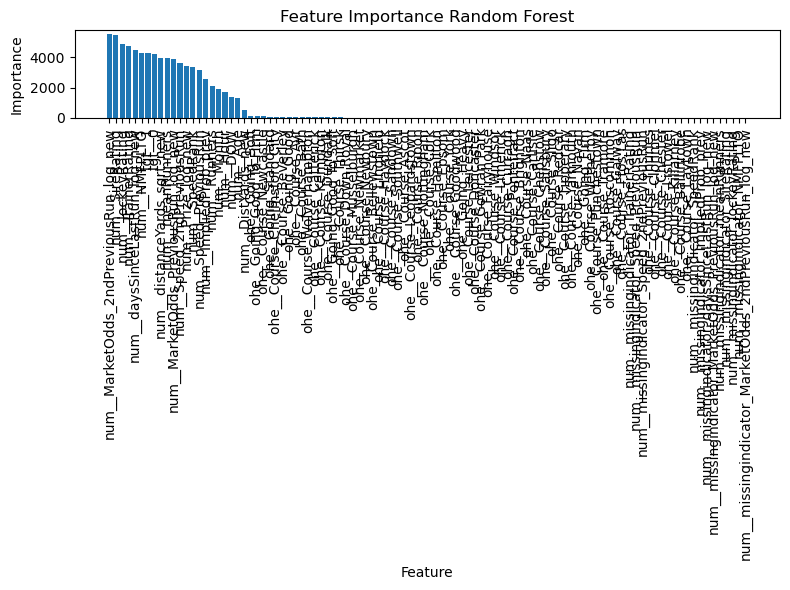

In [ ]:
importances = best_model.feature_importances_
feature_names = X.columns  # Assuming X_train is a DataFrame

# Sort features by importance
indices = np.argsort(importances)[::-1]
feature_names = main_pipeline.get_feature_names_out()
# Plot feature importance
plt.figure(figsize=(8, 6))
plt.title("Feature Importance Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

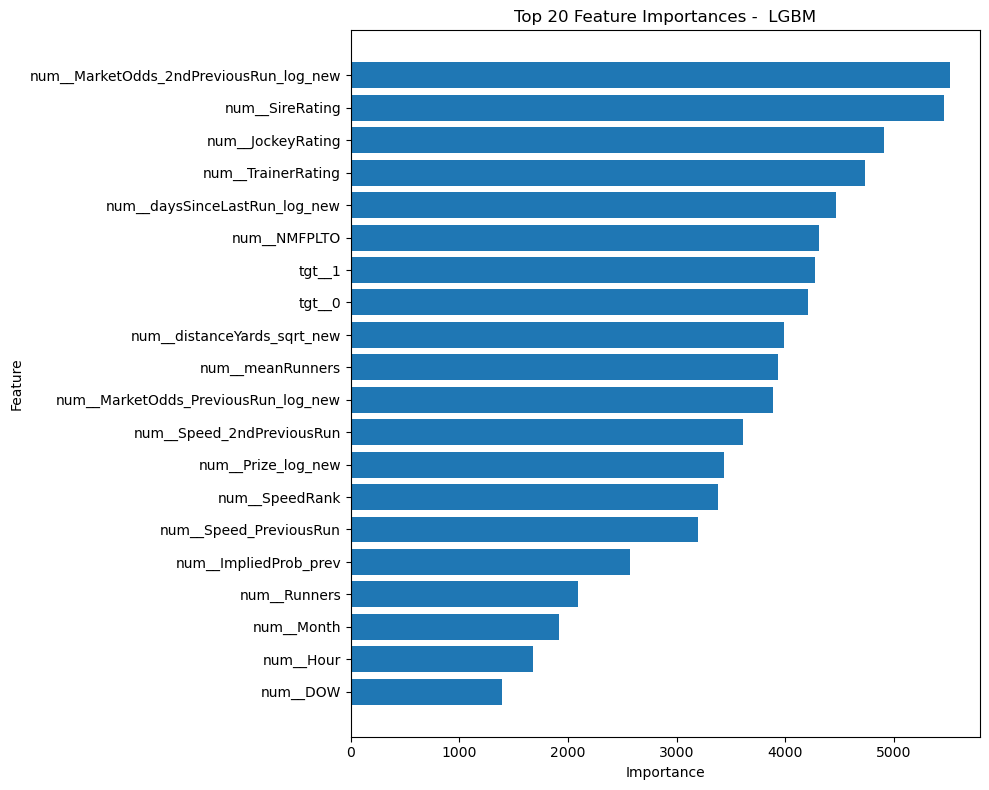

In [ ]:
top_n = 20
indices = np.argsort(importances)[::-1][:top_n]
top_features = [feature_names[i] for i in indices]
top_importances = importances[indices]

plt.figure(figsize=(10, 8))
plt.title(f"Top {top_n} Feature Importances -  LGBM")
plt.barh(range(top_n), top_importances[::-1], align="center")
plt.yticks(range(top_n), top_features[::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()